# Support Vector Machines with Python and Scikit-Learn



In this project, you will build a Support Vector Machines classifier to classify a Pulsar star.

## Table of Contents


1.	Introduction to Support Vector Machines
2.	Support Vector Machines intuition
3.	Kernel trick
4.	The problem statement
5.	Dataset description
6.	Import libraries
7.	Import dataset
8.	Exploratory data analysis
9.	Declare feature vector and target variable
10.	Split data into separate training and test set
11.	Feature scaling
12.	Run SVM with default hyperparameters
13.	Run SVM with linear kernel
14.	Run SVM with polynomial kernel
15.	Run SVM with sigmoid kernel
16.	Confusion matrix
17.	Classification metrices
18.	ROC - AUC
19.	Stratified k-fold Cross Validation with shuffle split
20.	Hyperparameter optimization using GridSearch CV
21.	Results and conclusion


## 1. Introduction to Support Vector Machines


**Support Vector Machines** (SVMs in short) are machine learning algorithms that are used for classification and regression purposes. SVMs are one of the powerful machine learning algorithms for classification, regression and outlier detection purposes. An SVM classifier builds a model that assigns new data points to one of the given categories. Thus, it can be viewed as a non-probabilistic binary linear classifier.

The original SVM algorithm was developed by Vladimir N Vapnik and Alexey Ya. Chervonenkis in 1963. At that time, the algorithm was in early stages. The only possibility is to draw hyperplanes for linear classifier. In 1992, Bernhard E. Boser, Isabelle M Guyon and Vladimir N Vapnik suggested a way to create non-linear classifiers by applying the kernel trick to maximum-margin hyperplanes. The current standard was proposed by Corinna Cortes and Vapnik in 1993 and published in 1995.

SVMs can be used for linear classification purposes. In addition to performing linear classification, SVMs can efficiently perform a non-linear classification using the **kernel trick**. It enable us to implicitly map the inputs into high dimensional feature spaces.




## 2. Support Vector Machines intuition


Now, we should be familiar with some SVM terminology. 


### Hyperplane

A hyperplane is a decision boundary which separates between given set of data points having different class labels. The SVM classifier separates data points using a hyperplane with the maximum amount of margin. This hyperplane is known as the `maximum margin hyperplane` and the linear classifier it defines is known as the `maximum margin classifier`.


### Support Vectors

Support vectors are the sample data points, which are closest to the hyperplane.  These data points will define the separating line or hyperplane better by calculating margins.


### Margin

A margin is a separation gap between the two lines on the closest data points. It is calculated as the perpendicular distance from the line to support vectors or closest data points. In SVMs, we try to maximize this separation gap so that we get maximum margin.


### SVM Under the hood

In SVMs, our main objective is to select a hyperplane with the maximum possible margin between support vectors in the given dataset. SVM searches for the maximum margin hyperplane in the following 2 step process –


1.	Generate hyperplanes which segregates the classes in the best possible way. There are many hyperplanes that might classify the data. We should look for the best hyperplane that represents the largest separation, or margin, between the two classes.

2.	So, we choose the hyperplane so that distance from it to the support vectors on each side is maximized. If such a hyperplane exists, it is known as the **maximum margin hyperplane** and the linear classifier it defines is known as a **maximum margin classifier**. 


### Problem with dispersed datasets


Sometimes, the sample data points are so dispersed that it is not possible to separate them using a linear hyperplane. 
In such a situation, SVMs uses a `kernel trick` to transform the input space to a higher dimensional space as shown in the diagram below. It uses a mapping function to transform the 2-D input space into the 3-D input space. Now, we can easily segregate the data points using linear separation.



## 3. Kernel trick


In practice, SVM algorithm is implemented using a `kernel`. It uses a technique called the `kernel trick`. In simple words, a `kernel` is just a function that maps the data to a higher dimension where data is separable. A kernel transforms a low-dimensional input data space into a higher dimensional space. So, it converts non-linear separable problems to linear separable problems by adding more dimensions to it. Thus, the kernel trick helps us to build a more accurate classifier. Hence, it is useful in non-linear separation problems.

In the context of SVMs, there are 4 popular kernels – `Linear kernel`, `Polynomial kernel` and `Radial Basis Function (RBF) kernel` (also called Gaussian kernel) and `Sigmoid kernel`. 

## 4. The problem statement


In this project, your task is to classify pulsar stars as either 'legitimate' or 'spurious'. The legitimate pulsar stars constitute a minority positive class, while the spurious pulsar stars form the majority negative class. You will need to implement the Support Vector Machines (SVMs) classification algorithm using Python and Scikit-Learn to address this challenge.



## 5. Dataset description


Pulsars are a rare type of Neutron star that produce radio emission detectable here on Earth. They are of considerable scientific interest as probes of space-time, the inter-stellar medium, and states of matter. Classification algorithms in particular are being adopted, which treat the data sets as binary classification problems. Here the legitimate pulsar examples form  minority positive class and spurious examples form the majority negative class.

The data set shared here contains 16,259 spurious examples caused by RFI/noise, and 1,639 real pulsar examples. Each row lists the variables first, and the class label is the final entry. The class labels used are 0 (negative) and 1 (positive).


### Attribute Information:


Each candidate is described by 8 continuous variables, and a single class variable. The first four are simple statistics obtained from the integrated pulse profile. The remaining four variables are similarly obtained from the DM-SNR curve . These are summarised below:

1. Mean of the integrated profile.

2. Standard deviation of the integrated profile.

3. Excess kurtosis of the integrated profile.

4. Skewness of the integrated profile.

5. Mean of the DM-SNR curve.

6. Standard deviation of the DM-SNR curve.

7. Excess kurtosis of the DM-SNR curve.

8. Skewness of the DM-SNR curve.

9. Class

## 6. Import libraries


You will start off by importing the required Python libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings

warnings.filterwarnings('ignore')

## 7.Import dataset

In [3]:
data = 'pulsar_stars.csv'

df = pd.read_csv(data)

## 8. Exploratory data analysis


Now, you can explore the data to gain insights about the data. 

In [4]:
# view dimensions of dataset

df.shape

(17898, 9)

There are 17898 instances and 9 variables in the data set.

In [5]:
# let's preview the dataset

df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


You can see that there are 9 variables in the dataset. 8 are continuous variables and 1 is discrete variable. The discrete variable is `target_class` variable. It is also the target variable.


Now, you can view the column names to check for leading and trailing spaces.

In [6]:
# view the column names of the dataframe

col_names = df.columns

col_names

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

You can see that there are leading spaces (spaces at the start of the string name) in the dataframe. So, you can remove these leading spaces.

In [7]:
# remove leading spaces from column names

df.columns = df.columns.str.strip()

You have removed the leading spaces from the column names. You can now view the column names again to confirm the same.

In [8]:
# view column names again

df.columns

Index(['Mean of the integrated profile',
       'Standard deviation of the integrated profile',
       'Excess kurtosis of the integrated profile',
       'Skewness of the integrated profile', 'Mean of the DM-SNR curve',
       'Standard deviation of the DM-SNR curve',
       'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

You can see that the leading spaces are removed from the column name. But the column names are very long. So, You can make them short by renaming them.

In [9]:
# rename column names

df.columns = ['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 
              'DM-SNR Mean', 'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class']

In [10]:
# view the renamed column names

df.columns

Index(['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 'DM-SNR Mean',
       'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class'],
      dtype='object')

You can see that the column names are shortened. IP stands for `integrated profile` and DM-SNR stands for `delta modulation and signal to noise ratio`. Now, it is much more easy to work with the columns.

The target variable is the `target_class` column. Let's first check its distribution.

In [11]:
# check distribution of target_class column

df['target_class'].value_counts()

0    16259
1     1639
Name: target_class, dtype: int64

In [12]:
# view the percentage distribution of target_class column
df['target_class'].value_counts()/np.float(len(df))

0    0.908426
1    0.091574
Name: target_class, dtype: float64

You can see that percentage of observations of the class label `0` and `1` is 90.84% and 9.16%. So, this is a class imbalanced problem. I will deal with that in later section.

In [13]:
# view summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   IP Mean          17898 non-null  float64
 1   IP Sd            17898 non-null  float64
 2   IP Kurtosis      17898 non-null  float64
 3   IP Skewness      17898 non-null  float64
 4   DM-SNR Mean      17898 non-null  float64
 5   DM-SNR Sd        17898 non-null  float64
 6   DM-SNR Kurtosis  17898 non-null  float64
 7   DM-SNR Skewness  17898 non-null  float64
 8   target_class     17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


You can see that there are no missing values in the dataset and all the variables are numerical variables.

### Explore missing values in variables

In [14]:
# check for missing values in variables

df.isnull().sum()

IP Mean            0
IP Sd              0
IP Kurtosis        0
IP Skewness        0
DM-SNR Mean        0
DM-SNR Sd          0
DM-SNR Kurtosis    0
DM-SNR Skewness    0
target_class       0
dtype: int64

You can see that there are no missing values in the dataset.

### Summary of numerical variables


- There are 9 numerical variables in the dataset.


- 8 are continuous variables and 1 is discrete variable. 


- The discrete variable is `target_class` variable. It is also the target variable.


- There are no missing values in the dataset.

### Outliers in numerical variables

In [15]:
# view summary statistics in numerical variables

round(df.describe(),2)

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness,target_class
count,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00
mean,111.08,46.55,0.48,1.77,12.61,26.33,8.30,104.86,0.09
std,25.65,6.84,1.06,6.17,29.47,19.47,4.51,106.51,0.29
min,5.81,24.77,-1.88,-1.79,0.21,7.37,-3.14,-1.98,0.00
25%,100.93,42.38,0.03,-0.19,1.92,14.44,5.78,34.96,0.00
50%,115.08,46.95,0.22,0.20,2.80,18.46,8.43,83.06,0.00
75%,127.09,51.02,0.47,0.93,5.46,28.43,10.70,139.31,0.00
max,192.62,98.78,8.07,68.10,223.39,110.64,34.54,1191.00,1.00


On closer inspection, you can suspect that all the continuous variables may contain outliers.


You can draw boxplots to visualise outliers in the above variables. 

Text(0, 0.5, 'IP Skewness')

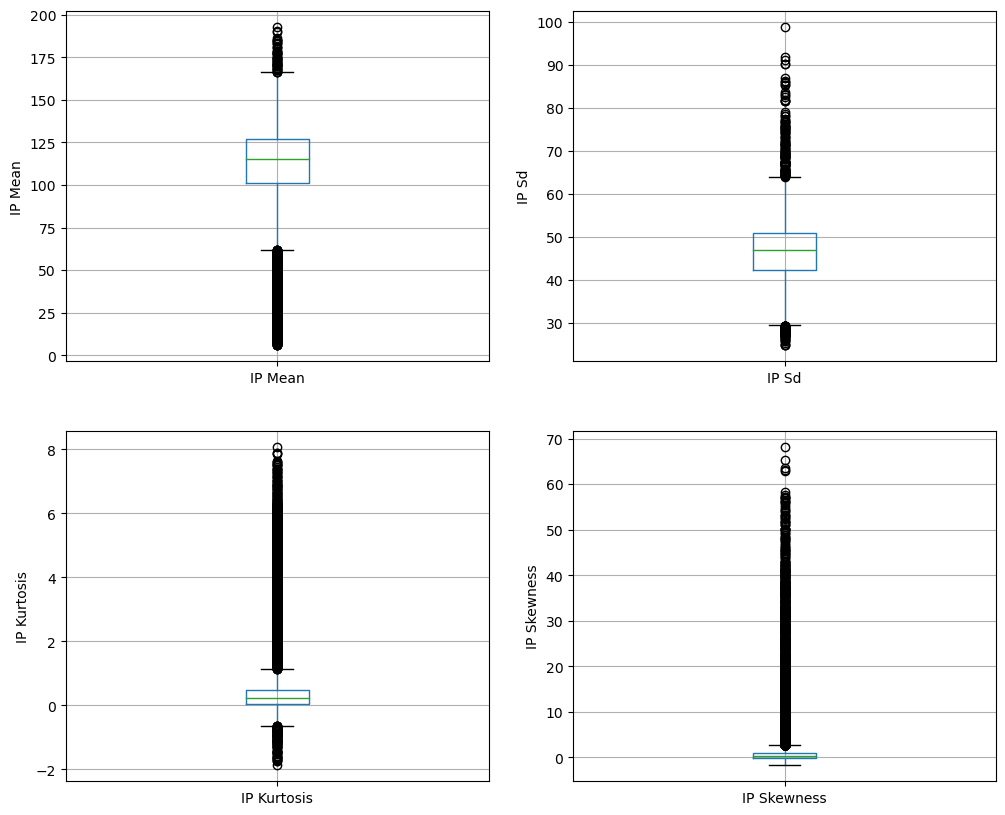

In [16]:
# draw boxplots to visualize outliers

plt.figure(figsize=(12,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='IP Mean')
fig.set_title('')
fig.set_ylabel('IP Mean')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='IP Sd')
fig.set_title('')
fig.set_ylabel('IP Sd')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='IP Kurtosis')
fig.set_title('')
fig.set_ylabel('IP Kurtosis')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='IP Skewness')
fig.set_title('')
fig.set_ylabel('IP Skewness')




**<font color="red">[Task]</font>** Please draw boxplots to visualise outliers for the remaining variables: 'DM-SNR Mean', 'DM-SNR Sd', 'DM-SNR Kurtosis' and 'DM-SNR Skewness'. 

Text(0, 0.5, 'DM-SNR Skewness')

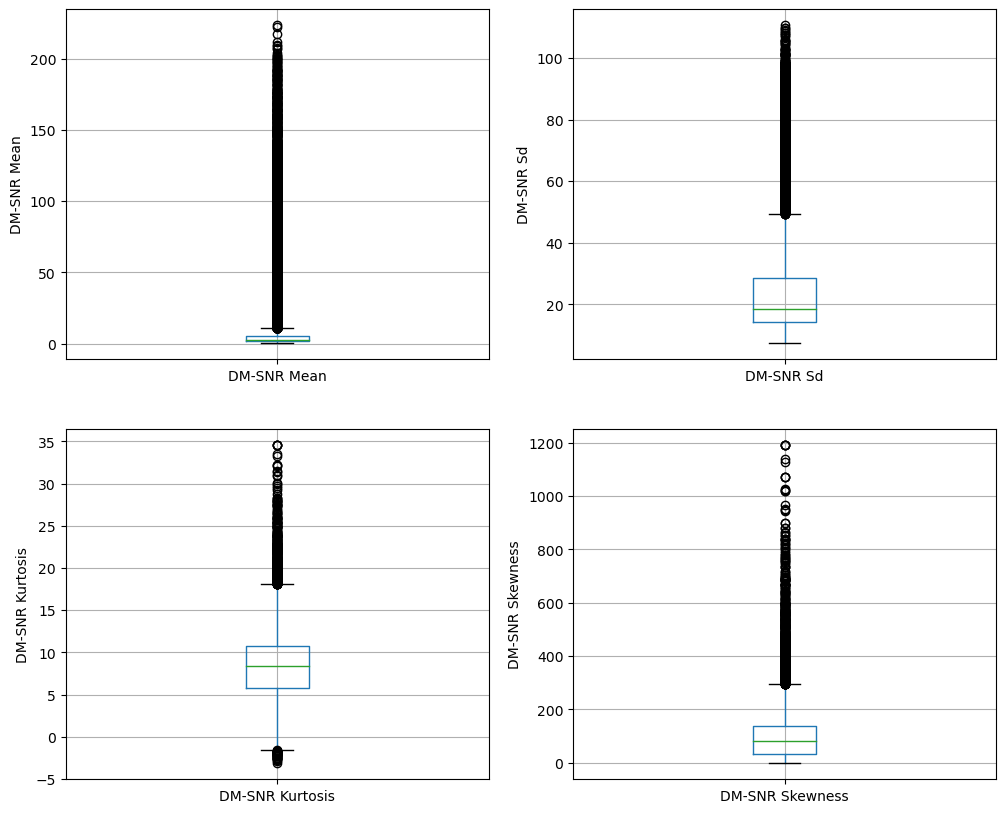

In [17]:
# draw boxplots to visualize outliers

plt.figure(figsize=(12,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='DM-SNR Mean')
fig.set_title('')
fig.set_ylabel('DM-SNR Mean')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='DM-SNR Sd')
fig.set_title('')
fig.set_ylabel('DM-SNR Sd')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='DM-SNR Kurtosis')
fig.set_title('')
fig.set_ylabel('DM-SNR Kurtosis')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='DM-SNR Skewness')
fig.set_title('')
fig.set_ylabel('DM-SNR Skewness')

The above boxplots confirm that there are lot of outliers in these variables.

### Handle outliers with SVMs


There are 2 variants of SVMs. They are `hard-margin variant of SVM` and `soft-margin variant of SVM`.


The `hard-margin variant of SVM` does not deal with outliers. In this case, we want to find the hyperplane with maximum margin such that every training point is correctly classified with margin at least 1. This technique does not handle outliers well.


Another version of SVM is called `soft-margin variant of SVM`. In this case, we can have a few points incorrectly classified or 
classified with a margin less than 1. But for every such point, we have to pay a penalty in the form of `C` parameter, which controls the outliers. `Low C` implies we are allowing more outliers and `high C` implies less outliers.


The message is that since the dataset contains outliers, so the value of C should be high while training the model.

### Check the distribution of variables


Now, you can plot the histograms to check distributions to find out if they are normal or skewed. 

Text(0, 0.5, 'Number of pulsar stars')

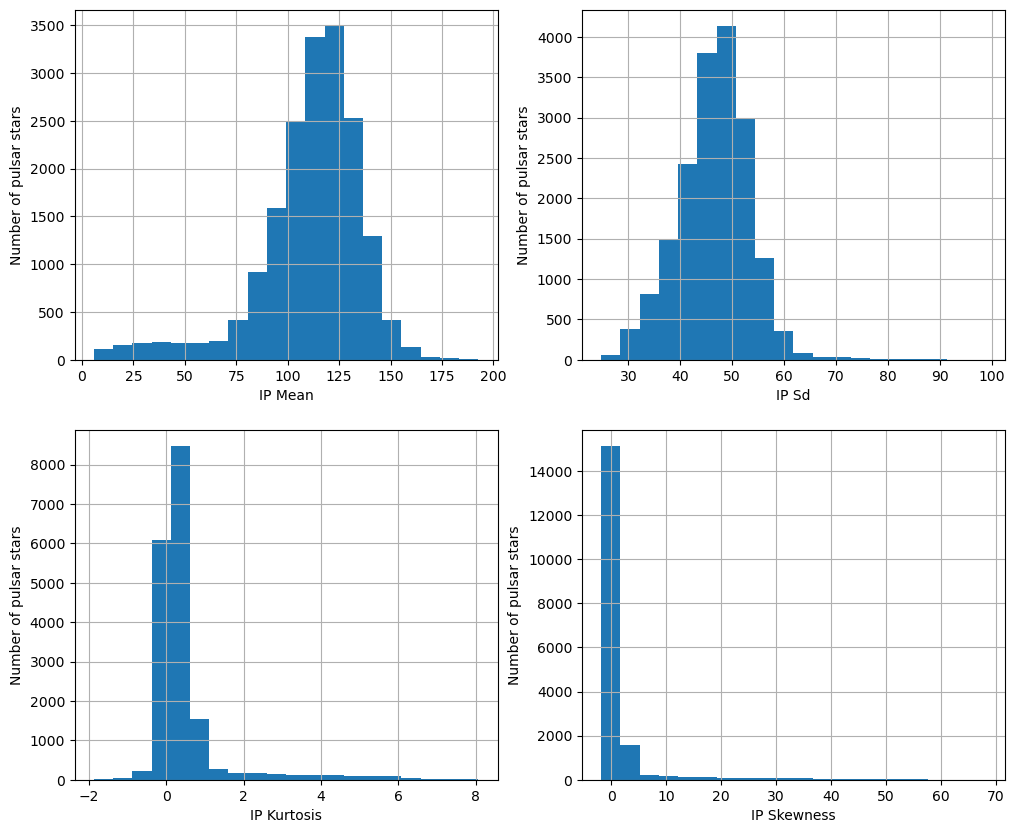

In [18]:
# plot histogram to check distribution


plt.figure(figsize=(12, 10))


plt.subplot(2, 2, 1)
fig = df['IP Mean'].hist(bins=20)
fig.set_xlabel('IP Mean')
fig.set_ylabel('Number of pulsar stars')


plt.subplot(2, 2, 2)
fig = df['IP Sd'].hist(bins=20)
fig.set_xlabel('IP Sd')
fig.set_ylabel('Number of pulsar stars')


plt.subplot(2, 2, 3)
fig = df['IP Kurtosis'].hist(bins=20)
fig.set_xlabel('IP Kurtosis')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(2, 2, 4)
fig = df['IP Skewness'].hist(bins=20)
fig.set_xlabel('IP Skewness')
fig.set_ylabel('Number of pulsar stars')



**<font color="red">[Task]</font>** Please draw histograms for the remaining variables: 'DM-SNR Mean', 'DM-SNR Sd', 'DM-SNR Kurtosis' and 'DM-SNR Skewness'. 

Text(0, 0.5, 'Number of pulsar stars')

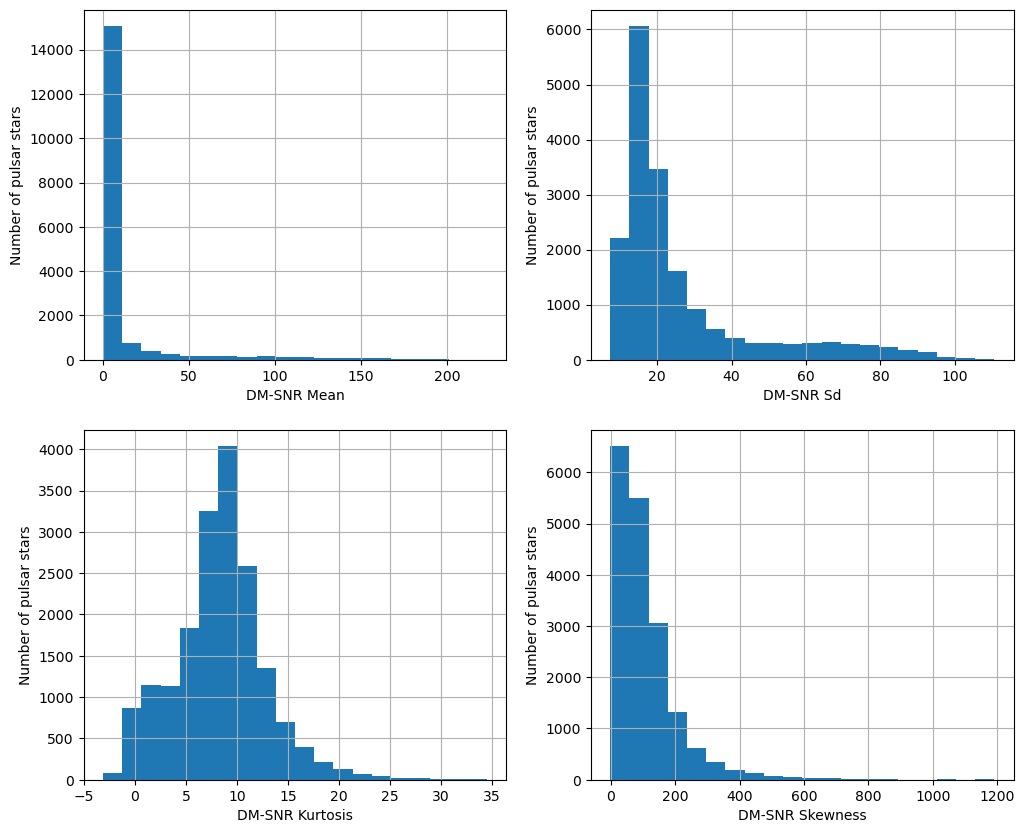

In [19]:
# plot histogram to check distribution


plt.figure(figsize=(12, 10))


plt.subplot(2, 2, 1)
fig = df['DM-SNR Mean'].hist(bins=20)
fig.set_xlabel('DM-SNR Mean')
fig.set_ylabel('Number of pulsar stars')


plt.subplot(2, 2, 2)
fig = df['DM-SNR Sd'].hist(bins=20)
fig.set_xlabel('DM-SNR Sd')
fig.set_ylabel('Number of pulsar stars')


plt.subplot(2, 2, 3)
fig = df['DM-SNR Kurtosis'].hist(bins=20)
fig.set_xlabel('DM-SNR Kurtosis')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(2, 2, 4)
fig = df['DM-SNR Skewness'].hist(bins=20)
fig.set_xlabel('DM-SNR Skewness')
fig.set_ylabel('Number of pulsar stars')



You can see that all the 8 continuous variables are skewed. 

## 9. Declare feature vector and target variable

In [20]:
X = df.drop(['target_class'], axis=1)

y = df['target_class']

## 10. Split data into separate training and test set

In [21]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [22]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((14318, 8), (3580, 8))

## 11. Feature Scaling

In [23]:
cols = X_train.columns

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)


In [25]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [26]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [27]:
X_train.describe()

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness
count,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04
mean,1.986604e-16,-6.735622e-16,1.792879e-17,3.631409e-17,-8.459267e-17,-1.563912e-16,-1.277090e-17,1.172992e-16
std,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00
min,-4.035499e+00,-3.181033e+00,-2.185946e+00,-5.744051e-01,-4.239001e-01,-9.733707e-01,-2.455649e+00,-1.003411e+00
25%,-3.896291e-01,-6.069473e-01,-4.256221e-01,-3.188054e-01,-3.664918e-01,-6.125457e-01,-5.641035e-01,-6.627590e-01
50%,1.587461e-01,5.846646e-02,-2.453172e-01,-2.578142e-01,-3.372294e-01,-4.067482e-01,3.170446e-02,-2.059136e-01
75%,6.267059e-01,6.501017e-01,-1.001238e-02,-1.419621e-01,-2.463724e-01,1.078934e-01,5.362759e-01,3.256217e-01
max,3.151882e+00,7.621116e+00,7.008906e+00,1.054430e+01,7.025568e+00,4.292181e+00,5.818557e+00,1.024613e+01


You now have `X_train` dataset ready to be fed into the SVM classifier. You will do it as follows.

## 12. Run SVM with default hyperparameters


Default hyperparameter means C=1.0,  kernel=`rbf` and gamma=`auto` among other parameters.

In [28]:
# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC() 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9827


### Run SVM with rbf kernel and C=100.0


You have seen that there are outliers in our dataset. So, you should increase the value of C as higher C means fewer outliers. 

**<font color="red">[Task]</font>** Please implement the SVM with kernel=`rbf` and C=100.0, and provide the accuracy of the test dataset.

In [29]:
# instantiate classifier with kernel=rbf and C=100.0
svc=SVC(kernel='rbf', C=100.0) 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with kernel=rbf and C=100.0: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with kernel=rbf and C=100.0: 0.9832


You should see that you obtain a higher accuracy with C=100.0 as higher C means less outliers.

Now, you will further increase the value of C=1000.0 and check accuracy.

### Run SVM with rbf kernel and C=1000.0

**<font color="red">[Task]</font>** Please implement the SVM with kernel=`rbf` and C=1000.0, and provide the accuracy of the test dataset.

In [30]:
# instantiate classifier with kernel=rbf and C=1000.0
svc=SVC(kernel='rbf', C=1000.0) 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with kernel=rbf and C=1000.0: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with kernel=rbf and C=1000.0: 0.9816


In this case, you should see that the accuracy had decreased with C=1000.0

### Check for overfitting and underfitting via comparing the train-set and test-set accuracy


Now, you will compare the train-set and test-set accuracy to check for overfitting.

In [31]:
y_pred_train = svc.predict(X_train)

y_pred_train

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [32]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(svc.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(svc.score(X_test, y_test)))

Training set score: 0.9850
Test set score: 0.9816


The training-set accuracy score is 0.9783 while the test-set accuracy to be 0.9830. These two values are quite comparable. So, there is no question of overfitting. 

## 13. Run SVM with linear kernel


### Run SVM with linear kernel and C=1.0

**<font color="red">[Task]</font>** Please implement the SVM with kernel=`linear` and C=1.0, and provide the accuracy of the test dataset.

In [33]:
# instantiate classifier with kernel=linear and C=1.0
svc=SVC(kernel='linear', C=1.0) 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with kernel=linear and C=1.0: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with kernel=linear and C=1.0: 0.9830


### Run SVM with linear kernel and C=100.0

**<font color="red">[Task]</font>** Please implement the SVM with kernel=`linear` and C=100.0, and provide the accuracy of the test dataset.

In [34]:
# instantiate classifier with kernel=linear and C=100.0
svc=SVC(kernel='linear', C=100.0) 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with kernel=linear and C=100.0: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with kernel=linear and C=100.0: 0.9832


### Run SVM with linear kernel and C=1000.0


**<font color="red">[Task]</font>** Please implement the SVM with kernel=`linear` and C=1000.0, and provide the accuracy of the test dataset.

In [35]:
# instantiate classifier with kernel=linear and C=1000.0
svc=SVC(kernel='linear', C=1000.0) 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with kernel=linear and C=1000.0: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with kernel=linear and C=1000.0: 0.9832


**<font color="red">[Task]</font>** Please provide your conclusion or summary of the results obtained using the linear kernel.

We now get the results that when kernel=linear:
1. when C = 1.0, we have accuracy 0.9830
2. when C = 100.0, we have accuracy 0.9832
3. when C = 1000.0, we have accuracy 0.9832

In conclusion, we can obtain a higher accuracy with C=100.0 and C=1000.0 as higher C means less outliers. Also, larger C affects less on the accuracy than the smaller C.

**<font color="red">[Task]</font>** Please check whether overfitting is present in the SVM with a linear kernel. Provide your conclusion and explain why.

In [36]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(svc.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(svc.score(X_test, y_test)))

Training set score: 0.9785
Test set score: 0.9832


The training-set accuracy score is 0.9785 while the test-set accuracy to be 0.9832. These two values are quite comparable. So, there is no question of overfitting. 

### Compare model accuracy with null accuracy


It is not enough to say that your model is very good based on the above accuracy. You must compare it with the **null accuracy**. Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.

So, you should first check the class distribution in the test set. 

In [37]:
# check class distribution in test set

y_test.value_counts()

0    3306
1     274
Name: target_class, dtype: int64

You can see that the occurences of most frequent class `0` is 3306. So, we can calculate null accuracy by dividing 3306 by total number of occurences.

**<font color="red">[Task]</font>** Please calculate the null accuracy.

In [38]:
null_accuracy = (3306/(3306+274))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.9235


If the accuray of your model is larger than the null accuray, you can conclude that your SVM classifier is doing a very good job in predicting the class labels.

**<font color="red">[Task]</font>** Please provide your comparative results.

The accuracy for over SVM classifier is larger than 0.9830, hence larger than the null accuracy score 0.9235. We conclude that our SVM classifier is doing a very good job in predicting the class labels.

## 14. Run SVM with polynomial kernel


### Run SVM with polynomial kernel and C=1.0

**<font color="red">[Task]</font>** Please implement the SVM with polynomial kernel and C=1.0, and provide the accuracy of the test dataset.

In [39]:
# instantiate classifier with kernel=poly and C=1.0
svc=SVC(kernel='poly', C=1.0) 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with kernel=poly and C=1.0: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with kernel=poly and C=1.0: 0.9807


 ### Run SVM with polynomial kernel and C=100.0

 
**<font color="red">[Task]</font>** Please implement the SVM with polynomial kernel and C=100.0, and provide the accuracy of the test dataset.

In [40]:
# instantiate classifier with kernel=poly and C=100.0
svc=SVC(kernel='poly', C=100.0) 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with kernel=poly and C=100.0: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with kernel=poly and C=100.0: 0.9824


**<font color="red">[Task]</font>** Compared to those of SVM with linear and rbf kernel, how do the results of SVM with polynomial kernel?

Similar to linear and rbf kernel, the accuracy increases as C goes larger.

The accuracy for polynomial kernel is a litter lower than the result of SVM with linear and rbf kernel, but the result is till larger than the null accuracy, hence it is still a good SVM classifier.

## 15. Run SVM with sigmoid kernel


### Run SVM with sigmoid kernel and C=1.0


**<font color="red">[Task]</font>** Please implement the SVM with sigmoid kernel and C=1.0, and provide the accuracy of the test dataset.

In [41]:
# instantiate classifier with kernel=sigmoid and C=1.0
svc=SVC(kernel='sigmoid', C=1.0) 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with kernel=sigmoid and C=1.0: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with kernel=sigmoid and C=1.0: 0.8858


### Run SVM with sigmoid kernel and C=100.0


**<font color="red">[Task]</font>** Please implement the SVM with sigmoid kernel and C=100.0, and provide the accuracy of the test dataset.

In [42]:
# instantiate classifier with kernel=sigmoid and C=100.0
svc=SVC(kernel='sigmoid', C=100.0) 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with kernel=sigmoid and C=100.0: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with kernel=sigmoid and C=100.0: 0.8855


**<font color="red">[Task]</font>** Compared to those of SVM with linear, rbf and polynomial kernel, how do the results of SVM with sigmoid kernel?

Different from previous kernels, the accuracy does not goes larger as C goes larger.

The accuracy for polynomial kernel is a much lower than the result of SVM with previous kernels, and it is even lower than the null accuracy. Hence it is not a good SVM classifier.

### Comments


Since the dataset is imbalanced, accuracy is an inadequate measure for quantifying predictive performance.

So, you must explore alternative metrices that provide better guidance in selecting models. 

In particular, you would like to know the underlying distribution of values and the type of errors your classifer is making. 


One such metric to analyze the model performance in imbalanced classes problem is `Confusion matrix`.

## 16. Confusion matrix


A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.


Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-


**True Positives (TP)** – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.


**True Negatives (TN)** – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.


**False Positives (FP)** – False Positives occur when we predict an observation belongs to a    certain class but the observation actually does not belong to that class. This type of error is called **Type I error.**



**False Negatives (FN)** – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called **Type II error.**



These four outcomes are summarized in a confusion matrix given below.


In [43]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

y_pred_test=svc.predict(X_test)
cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[3080  226]
 [ 184   90]]

True Positives(TP) =  3080

True Negatives(TN) =  90

False Positives(FP) =  226

False Negatives(FN) =  184


The confusion matrix shows `3287 + 231 = 3518 correct predictions` and `19 + 43 = 62 incorrect predictions`.


In this case, you have


- `True Positives` (Actual Positive:1 and Predict Positive:1) - 3287


- `True Negatives` (Actual Negative:0 and Predict Negative:0) - 231


- `False Positives` (Actual Negative:0 but Predict Positive:1) - 19 `(Type I error)`


- `False Negatives` (Actual Positive:1 but Predict Negative:0) - 43 `(Type II error)`

<AxesSubplot:>

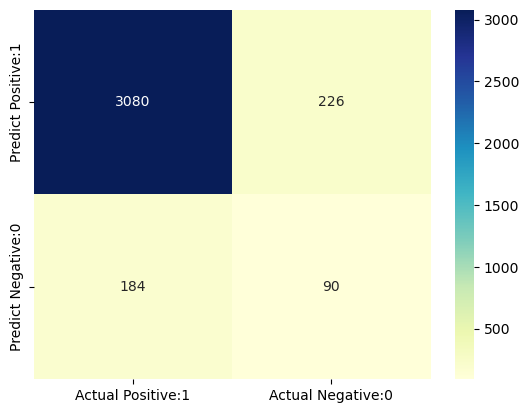

In [44]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## 17. Classification metrices

### Classification Report


**Classification report** is another way to evaluate the classification model performance. It displays the  **precision**, **recall**, **f1** and **support** scores for the model. I have described these terms in later.

You can print a classification report as follows:-

In [45]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      3306
           1       0.28      0.33      0.31       274

    accuracy                           0.89      3580
   macro avg       0.61      0.63      0.62      3580
weighted avg       0.89      0.89      0.89      3580



### Classification accuracy

In [46]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [47]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))


Classification accuracy : 0.8855


### Classification error

In [48]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))


Classification error : 0.1145


### Precision


**Precision** can be defined as the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true and false positives (TP + FP). 


So, **Precision** identifies the proportion of correctly predicted positive outcome. It is more concerned with the positive class than the negative class.



Mathematically, precision can be defined as the ratio of `TP to (TP + FP)`.


**<font color="red">[Task]</font>** Please calculate the **precision**.


In [49]:
precision = (TP / float(TP + FP))
print('Precision : {0:0.4f}'.format(precision))


Precision : 0.9316


### Recall


Recall can be defined as the percentage of correctly predicted positive outcomes out of all the actual positive outcomes.
It can be given as the ratio of true positives (TP) to the sum of true positives and false negatives (TP + FN). **Recall** is also called **Sensitivity**.


**Recall** identifies the proportion of correctly predicted actual positives.


Mathematically, **recall** can be defined as the ratio of `TP to (TP + FN)`.

**<font color="red">[Task]</font>** Please calculate the **recall**.


In [50]:
recall = (TP / float(TP + FN))
print('Recall : {0:0.4f}'.format(recall))

Recall : 0.9436


### True Positive Rate


**True Positive Rate** is synonymous with **Recall**.


### False Positive Rate

In [51]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.7152


### Specificity

In [52]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.2848


### f1-score


**f1-score** is the weighted harmonic mean of precision and recall. The best possible **f1-score** would be 1.0 and the worst 
would be 0.0.  **f1-score** is the harmonic mean of precision and recall. So, **f1-score** is always lower than accuracy measures as they embed precision and recall into their computation. The weighted average of `f1-score` should be used to 
compare classifier models, not global accuracy.


### Support


**Support** is the actual number of occurrences of the class in the dataset.

## 18. ROC - AUC



### ROC Curve


Another tool to measure the classification model performance visually is **ROC Curve**. ROC Curve stands for **Receiver Operating Characteristic Curve**. An **ROC Curve** is a plot which shows the performance of a classification model at various 
classification threshold levels. 



The **ROC Curve** plots the **True Positive Rate (TPR)** against the **False Positive Rate (FPR)** at various threshold levels.



**True Positive Rate (TPR)** is also called **Recall**. It is defined as the ratio of `TP to (TP + FN)`.



**False Positive Rate (FPR)** is defined as the ratio of `FP to (FP + TN)`.



In the ROC Curve, you will focus on the TPR (True Positive Rate) and FPR (False Positive Rate) of a single point. This will give you the general performance of the ROC curve which consists of the TPR and FPR at various threshold levels. So, an ROC Curve plots TPR vs FPR at different classification threshold levels. If you lower the threshold levels, it may result in more items being classified as positve. It will increase both True Positives (TP) and False Positives (FP).



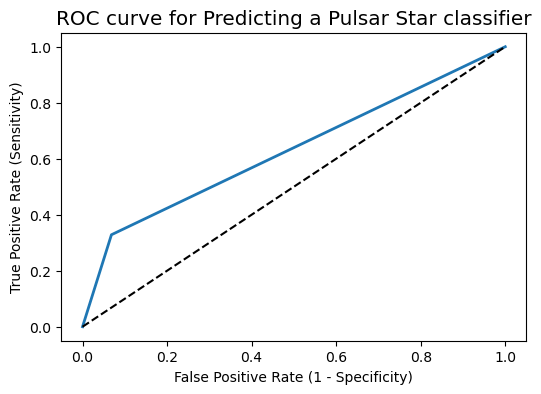

In [53]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Predicting a Pulsar Star classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()


ROC curve help us to choose a threshold level that balances sensitivity and specificity for a particular context.

### ROC  AUC


**ROC AUC** stands for **Receiver Operating Characteristic - Area Under Curve**. It is a technique to compare classifier performance. In this technique, you can measure the `area under the curve (AUC)`. A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5. 


So, **ROC AUC** is the percentage of the ROC plot that is underneath the curve.

In [54]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred_test)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.6301


### Comments


- ROC AUC is a single number summary of classifier performance. The higher the value, the better the classifier.

- ROC AUC of the model approaches towards 1. So, you can conclude that your classifier does a good job in classifying the pulsar star.

In [55]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(svc, X_train, y_train, cv=10, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.8719


## 19. Stratified k-fold Cross Validation with shuffle split


k-fold cross-validation is a very useful technique to evaluate model performance. But, it fails here because you have a imbalnced dataset. So, in the case of imbalanced dataset, you will use another technique to evaluate model performance. It is called `stratified k-fold cross-validation`.


In `stratified k-fold cross-validation`, you split the data such that the proportions between classes are the same in each fold as they are in the whole dataset.


Moreover, you will shuffle the data before splitting because shuffling yields much better result.

### Stratified k-Fold Cross Validation with shuffle split with  linear kernel

In [56]:
from sklearn.model_selection import KFold


kfold=KFold(n_splits=5, shuffle=True, random_state=0)


linear_svc=SVC(kernel='linear')


linear_scores = cross_val_score(linear_svc, X, y, cv=kfold)


In [57]:
# fit classifier to training set
linear_svc.fit(X_train,y_train)


# make predictions on test set
y_pred=linear_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9830


In [58]:
# print cross-validation scores with linear kernel

print('Stratified cross-validation scores with linear kernel:\n\n{}'.format(linear_scores))

Stratified cross-validation scores with linear kernel:

[0.98296089 0.97458101 0.97988827 0.97876502 0.97848561]


In [59]:
# print average cross-validation score with linear kernel

print('Average stratified cross-validation score with linear kernel:{:.4f}'.format(linear_scores.mean()))

Average stratified cross-validation score with linear kernel:0.9789


### Stratified k-Fold Cross Validation with shuffle split with rbf kernel


**<font color="red">[Task]</font>** Please implement the stratified k-Fold Cross Validation with shuffle split with rbf kernel, and then print the stratified cross-validation scores along with their average.

In [60]:


kfold=KFold(n_splits=5, shuffle=True, random_state=0)


linear_svc=SVC(kernel='rbf')


linear_scores = cross_val_score(linear_svc, X, y, cv=kfold)


In [61]:
# fit classifier to training set
linear_svc.fit(X_train,y_train)


# make predictions on test set
y_pred=linear_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9827


In [62]:
# print cross-validation scores with linear kernel

print('Stratified cross-validation scores with rbf kernel:\n\n{}'.format(linear_scores))

Stratified cross-validation scores with rbf kernel:

[0.97849162 0.97011173 0.97318436 0.9709416  0.96982397]


In [63]:
# print average cross-validation score with linear kernel

print('Average stratified cross-validation score with rbf kernel:{:.4f}'.format(linear_scores.mean()))

Average stratified cross-validation score with rbf kernel:0.9725


### Comments

You can obtain higher average stratified k-fold cross-validation score of 0.9789 with linear kernel but the model accuracy is 0.9832.
So, stratified cross-validation technique does not help to improve the model performance.

## 20. Hyperparameter Optimization using GridSearch CV

In [64]:
# import GridSearchCV
from sklearn.model_selection import GridSearchCV


# import SVC classifier
from sklearn.svm import SVC


# instantiate classifier with default hyperparameters with kernel=rbf, C=1.0 and gamma=auto
svc=SVC() 



# declare parameters for hyperparameter tuning
parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
               {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
               {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]} 
              ]




grid_search = GridSearchCV(estimator = svc,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'degree': [2, 3, 4],
                          'gamma': [0.01, 0.02, 0.03, 0.04, 0.05],
                          'kernel': ['poly']}],
             scoring='accuracy')

In [65]:
# examine the best model


# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))


# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))


# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.9793


Parameters that give the best results : 

 {'C': 10, 'gamma': 0.3, 'kernel': 'rbf'}


Estimator that was chosen by the search : 

 SVC(C=10, gamma=0.3)


In [66]:
# calculate GridSearch CV score on test set

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV score on test set: 0.9835


### Comments


- Your original model test accuracy is 0.9830 while GridSearch CV score on test-set is 0.9835.


- So, GridSearch CV helps to identify the parameters that will improve the performance for this particular model.


- Here, you should not confuse `best_score_` attribute of `grid_search` with the `score` method on the test-set. 


- The `score` method on the test-set gives the generalization performance of the model. Using the `score` method, we employ a model trained on the whole training set.


- The `best_score_` attribute gives the mean cross-validation accuracy, with cross-validation performed on the training set.

## 21. Results and conclusion



1. There are outliers in our dataset. So, as you can increase the value of C to limit fewer outliers, the accuracy increased. This is true with different kinds of kernels.

2.	You get maximum accuracy with `rbf` and `linear` kernel with C=100.0 and the accuracy is 0.9830. So, you can conclude that your model is doing a very good job in terms of predicting the class labels. But, this is not true. Here, you have an imbalanced dataset. Accuracy is an inadequate measure for quantifying predictive performance in the imbalanced dataset problem. So, you must explore `confusion matrix` that provide better guidance in selecting models. 

3.	ROC AUC of your model is very close to 1. So, you can conclude that your classifier does a good job in classifying the pulsar star.

4.	You obtain higher average stratified k-fold cross-validation score of 0.9789 with linear kernel but the model accuracy is 0.9830. So, stratified cross-validation technique does not help to improve the model performance.

5.	Your original model test accuracy is 0.9830 while GridSearch CV score on test-set is 0.9835. So, GridSearch CV helps to identify the parameters that will improve the performance for this particular model.
